# Cardiovascular Risk Prediction
>Kanishk Khandare
>DS24MS15



**Import Libraries**

- Data handling (pandas, numpy)
- Visualization (matplotlib, seaborn)
- Preprocessing (scaling, encoding)
- Modeling (Logistic Regression, Decision Tree, Random Forest, SVM, KNN)
- Evaluation (confusion matrix, precision, recall, F1-score)

```python
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

# DataFrame to store model performances
scores = pd.DataFrame(columns=['Model', 'Cross Val Score', 'Train Acc', 'Test Acc', 'Precision', 'Recall', 'F1-Score'])

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

import warnings

warnings.filterwarnings('ignore')

scores = pd.DataFrame(columns=['Model', 'Cross Val Score', 'Train Acc', 'Test Acc', 'Precision', 'Recall', 'F1-Score'])

**Loading and Preparing the Dataset**

We load the cardiovascular risk dataset and remove unnecessary columns (like `id`).

```python

df = pd.read_csv('https://raw.githubusercontent.com/Zaid-N-Ansari/PG-Mini-Project/refs/heads/main/Data/CardioVascularRisk.csv')

df.drop(['id'], axis=1, inplace=True)

# Define features and target
df_columns = df.columns
features = df_columns[:-1]
target = df_columns[-1]

# Display random samples
df.sample(10).sort_index()

In [2]:
# df = pd.read_csv('../Data/CardioVascularRisk.csv')
df = pd.read_csv('https://raw.githubusercontent.com/Zaid-N-Ansari/PG-Mini-Project/refs/heads/main/Data/CardioVascularRisk.csv')
df.drop(['id'], axis=1, inplace=True)
df_columns = df.columns

features = df_columns[:-1]
target = df_columns[-1]

df.sample(10).sort_index()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
87,64,1.0,M,YES,20.0,0.0,0,0,0,232.0,113.5,70.0,21.03,80.0,58.0,1
285,42,4.0,M,YES,20.0,0.0,0,0,0,166.0,110.0,70.0,19.97,75.0,69.0,0
1342,40,4.0,M,NO,0.0,0.0,0,1,0,213.0,145.0,100.5,27.34,95.0,117.0,0
1348,56,1.0,M,NO,0.0,0.0,0,1,0,194.0,127.0,83.0,26.05,80.0,73.0,0
1585,59,1.0,F,NO,0.0,0.0,0,1,0,254.0,181.0,101.0,24.67,76.0,68.0,0
1749,60,3.0,M,YES,10.0,0.0,0,1,0,250.0,157.0,94.0,29.89,63.0,68.0,1
2107,38,1.0,M,YES,9.0,0.0,0,0,0,274.0,120.0,80.0,25.17,80.0,68.0,0
2411,50,4.0,M,YES,43.0,1.0,0,1,0,255.0,126.5,92.5,25.35,90.0,74.0,0
3007,36,2.0,M,YES,25.0,0.0,0,0,0,215.0,110.0,67.0,23.10,63.0,84.0,0
3279,55,1.0,F,NO,0.0,0.0,0,1,0,305.0,168.0,82.0,26.45,72.0,78.0,0


**Data Type Adjustment for Categorical Variables**

Categorical columns are explicitly converted to the `object` type for better handling later during encoding.


In [3]:
ndf = pd.DataFrame()
ndf['education'] = df['education'].astype(object)
ndf['sex']=df['sex'].astype(object)
ndf['is_smoking'] = df['is_smoking'].astype(object)
ndf['BPMeds'] = df['BPMeds'].astype(object)
ndf['prevalentStroke'] = df['prevalentStroke'].astype(object)
ndf['prevalentHyp'] = df['prevalentHyp'].astype(object)
ndf['diabetes'] = df['diabetes'].astype(object)

ndf.describe(include=['object']).T

,count,unique,top,freq
education,3303.0,4.0,1.0,1391.0
sex,3390,2,F,1923
is_smoking,3390,2,NO,1703
BPMeds,3346.0,2.0,0.0,3246.0
prevalentStroke,3390,2,0,3368
prevalentHyp,3390,2,0,2321
diabetes,3390,2,0,3303


**Numerical Feature Summary**

We check basic statistics like mean, min, max, etc. for all numerical columns.

df.describe().T


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5


**Dataset Overview**

Let's get the high-level info: data types, non-null counts, memory usage.

```python
df.info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


**Unique Value Count and Missing Values Check**

This loop helps us understand the uniqueness of each feature and identify missing values.


In [6]:
for col in df.columns:
	print(f'Unique values in {col}: {df[col].nunique()}')
	print(f'Missing values in {col}: {df[col].isnull().sum()}')
	print(f'Data type of {col}: {df[col].dtype}')
	print('-' * 35)

Unique values in age: 39
Missing values in age: 0
Data type of age: int64
-----------------------------------
Unique values in education: 4
Missing values in education: 87
Data type of education: float64
-----------------------------------
Unique values in sex: 2
Missing values in sex: 0
Data type of sex: object
-----------------------------------
Unique values in is_smoking: 2
Missing values in is_smoking: 0
Data type of is_smoking: object
-----------------------------------
Unique values in cigsPerDay: 32
Missing values in cigsPerDay: 22
Data type of cigsPerDay: float64
-----------------------------------
Unique values in BPMeds: 2
Missing values in BPMeds: 44
Data type of BPMeds: float64
-----------------------------------
Unique values in prevalentStroke: 2
Missing values in prevalentStroke: 0
Data type of prevalentStroke: int64
-----------------------------------
Unique values in prevalentHyp: 2
Missing values in prevalentHyp: 0
Data type of prevalentHyp: int64
-------------------

**Exploratory Data Analysis (EDA)**

> Numerical Features Distribution

Histograms reveal the distribution and skewness of continuous variables.

```python
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Numerical Feature Distributions', y=0.92)
plt.show()
```



> Categorical Feature Distribution

Bar plots show the counts of each category.

```python
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
```


> Target Variable Distribution

Check for class imbalance in the `TenYearCHD` target.

```python
plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=df)
plt.title('Distribution of Target Variable (TenYearCHD)')
plt.show()


#Outlier Detection with Boxplots

```python
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_features], orient="v")
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()



#Age Distribution Across Categories

Analyzing how age varies across different categories.

```python
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='age', data=df)
    plt.title(f'Age by {col}')
    plt.xticks(rotation=45)
    plt.show()



#Pairwise Feature Relationships with Target Highlighted

```python
sns.pairplot(df[numerical_features + [target]], hue=target, diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features with Target', y=1.02)
plt.show()


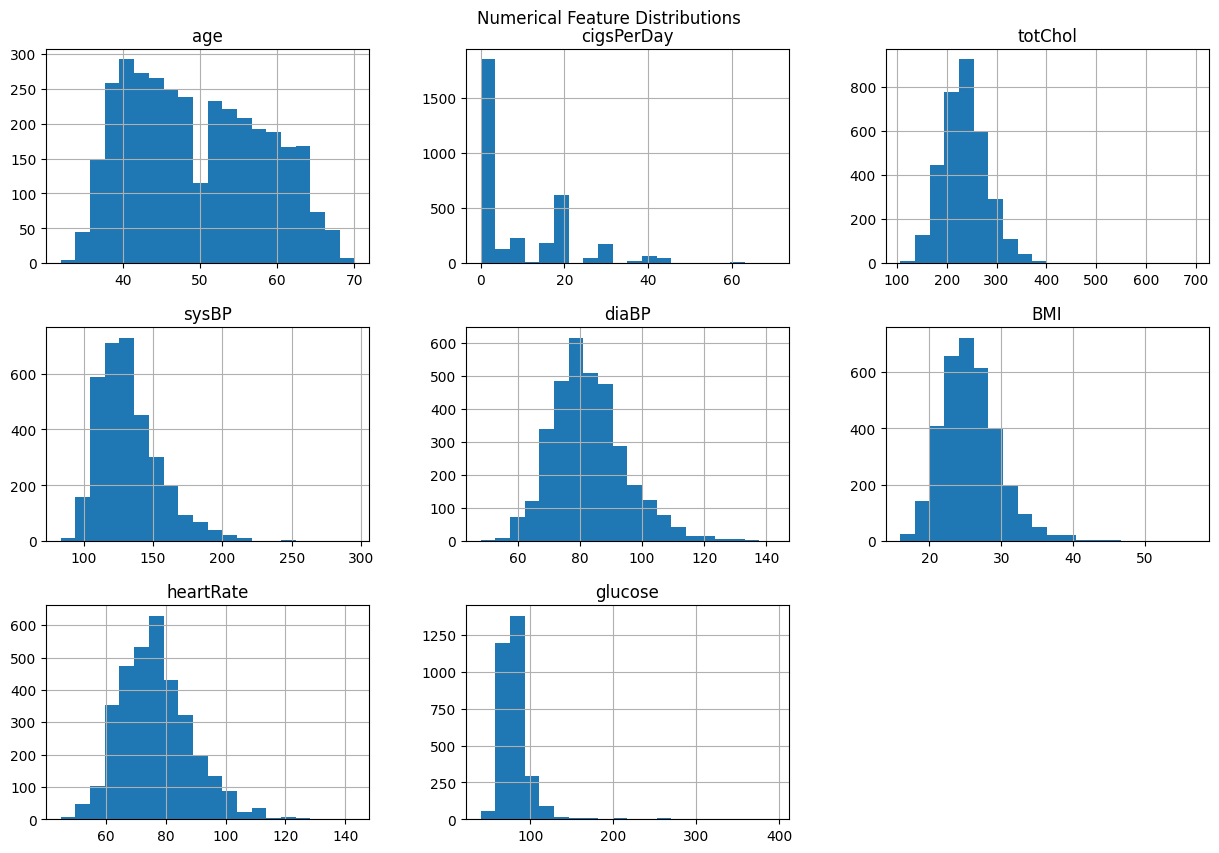

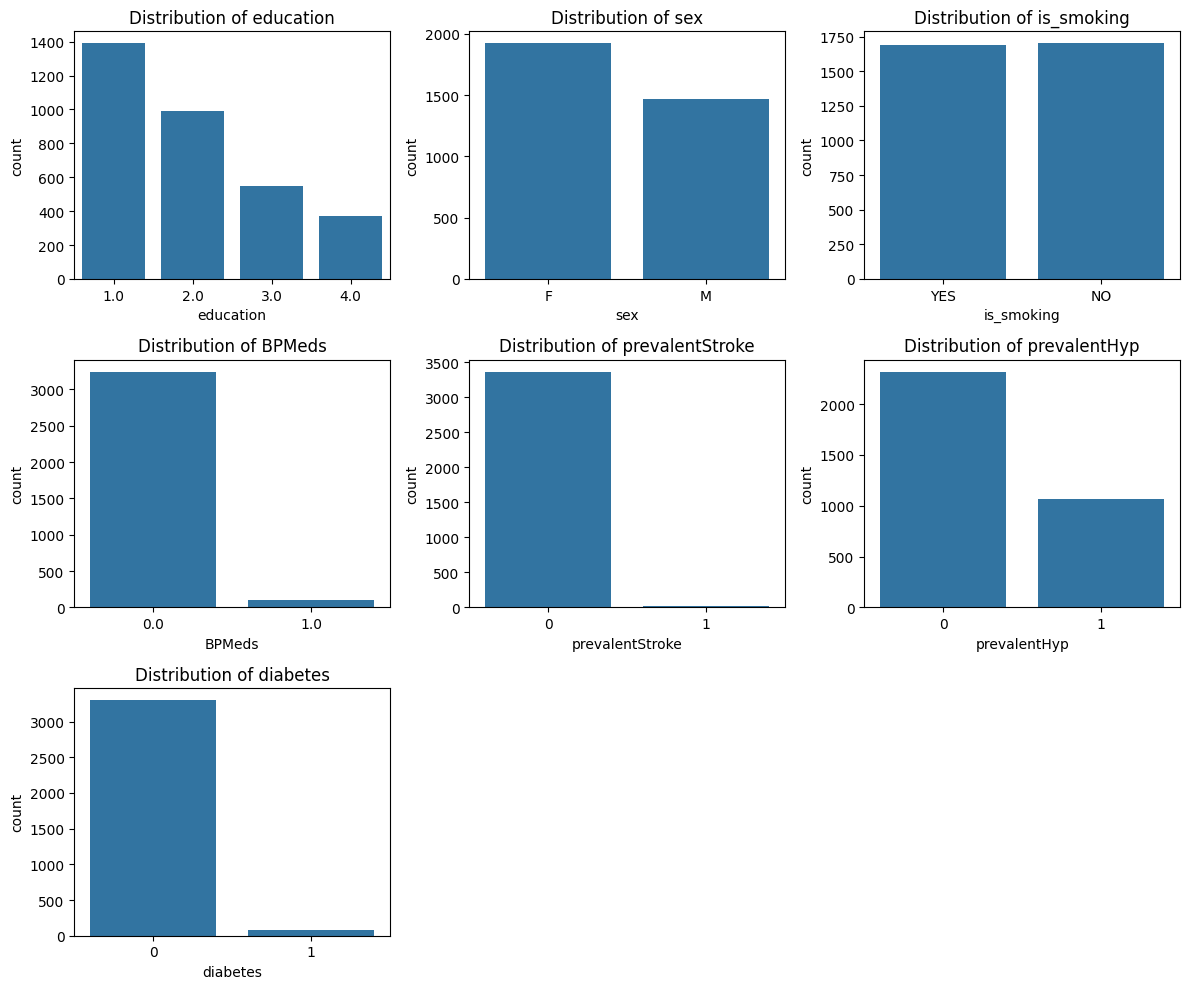

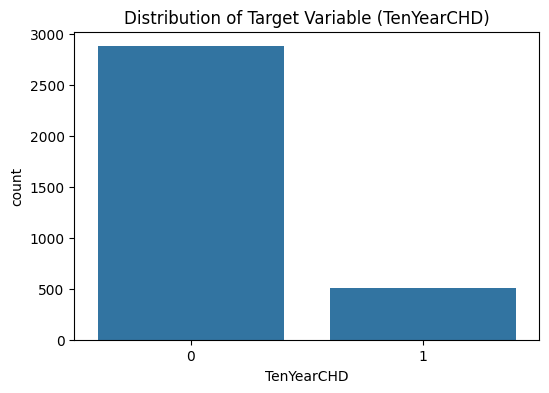

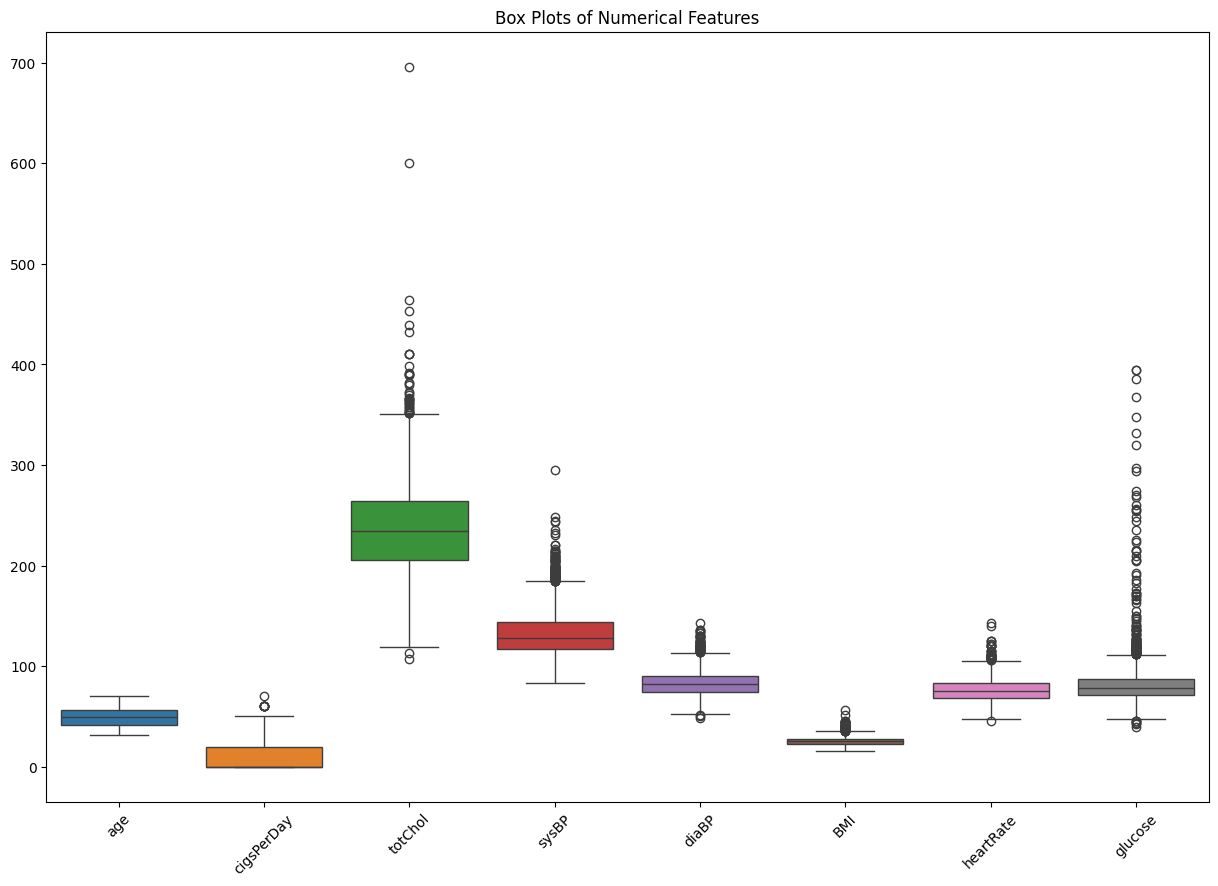

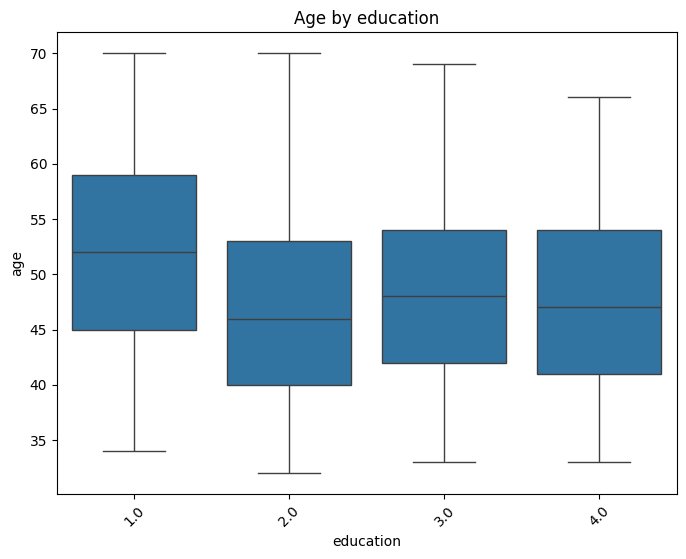

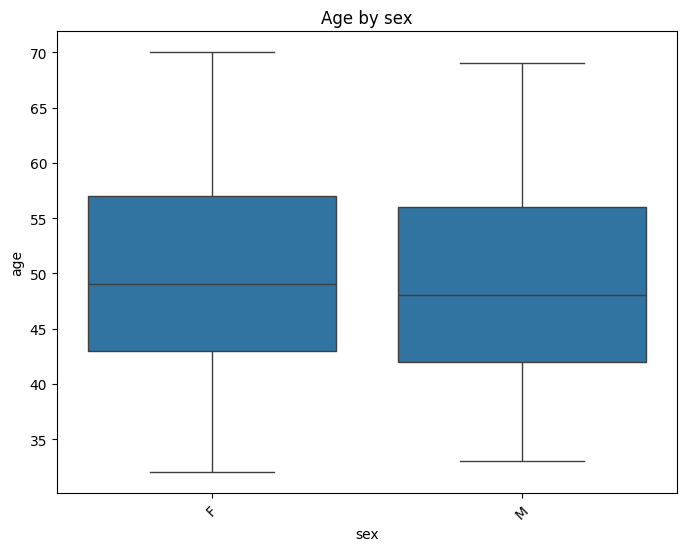

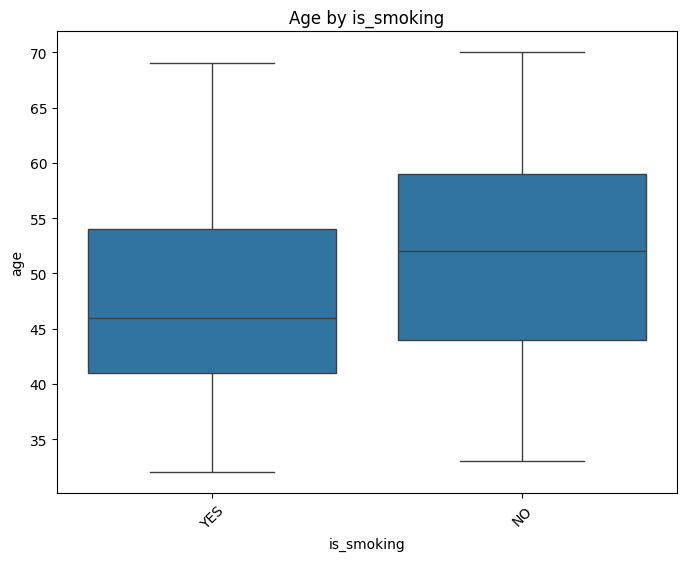

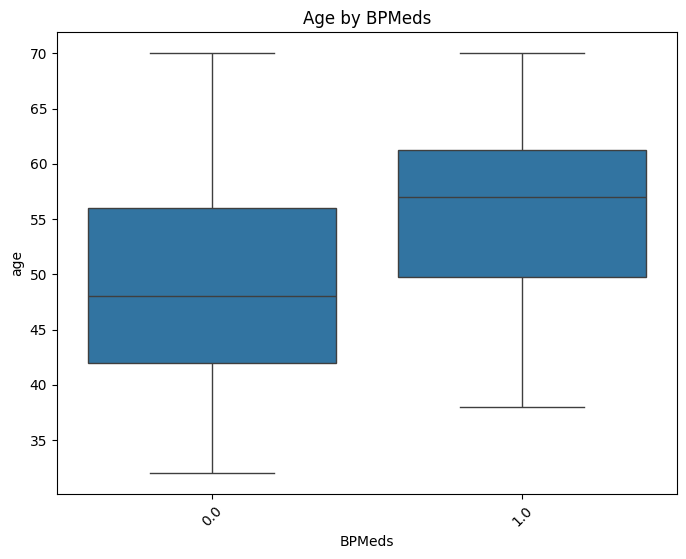

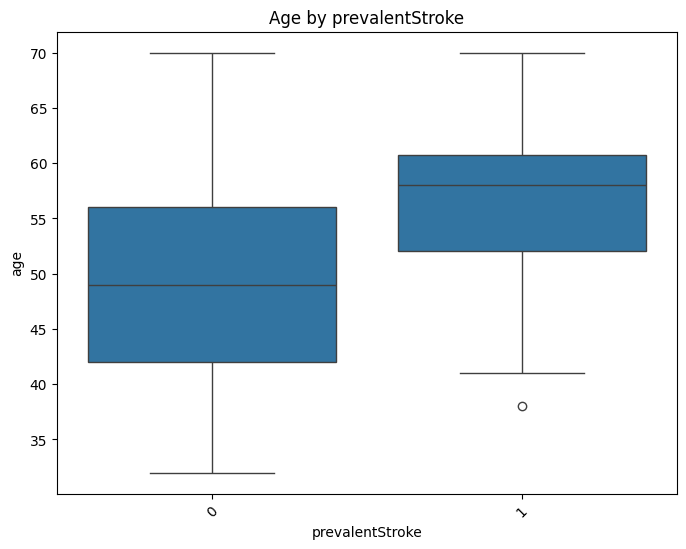

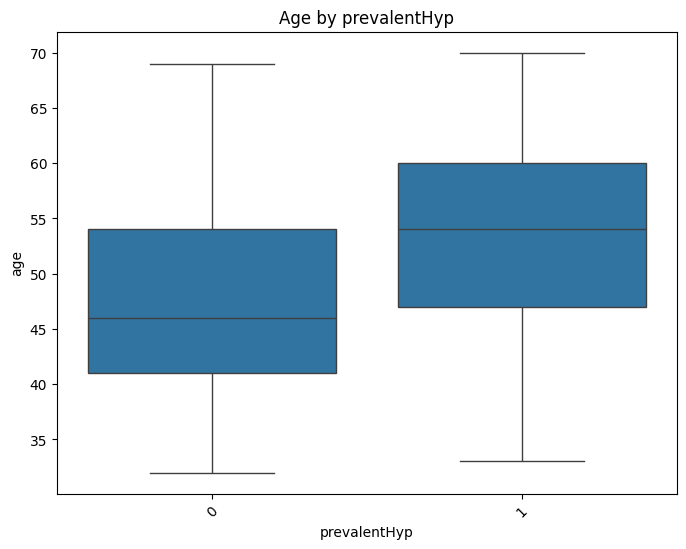

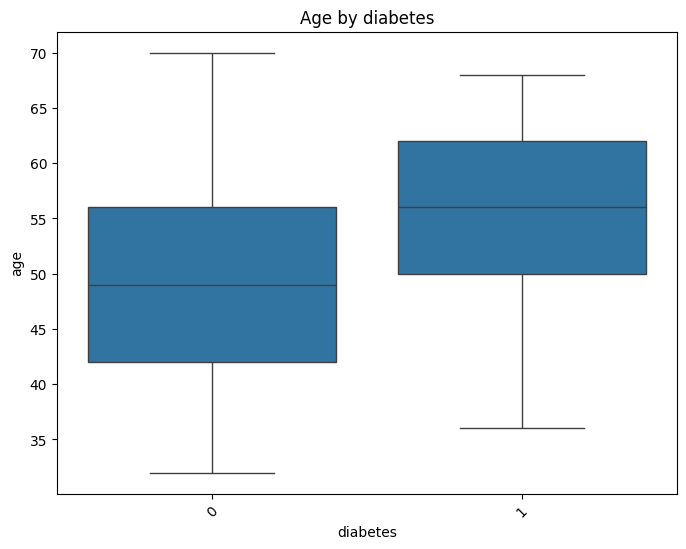

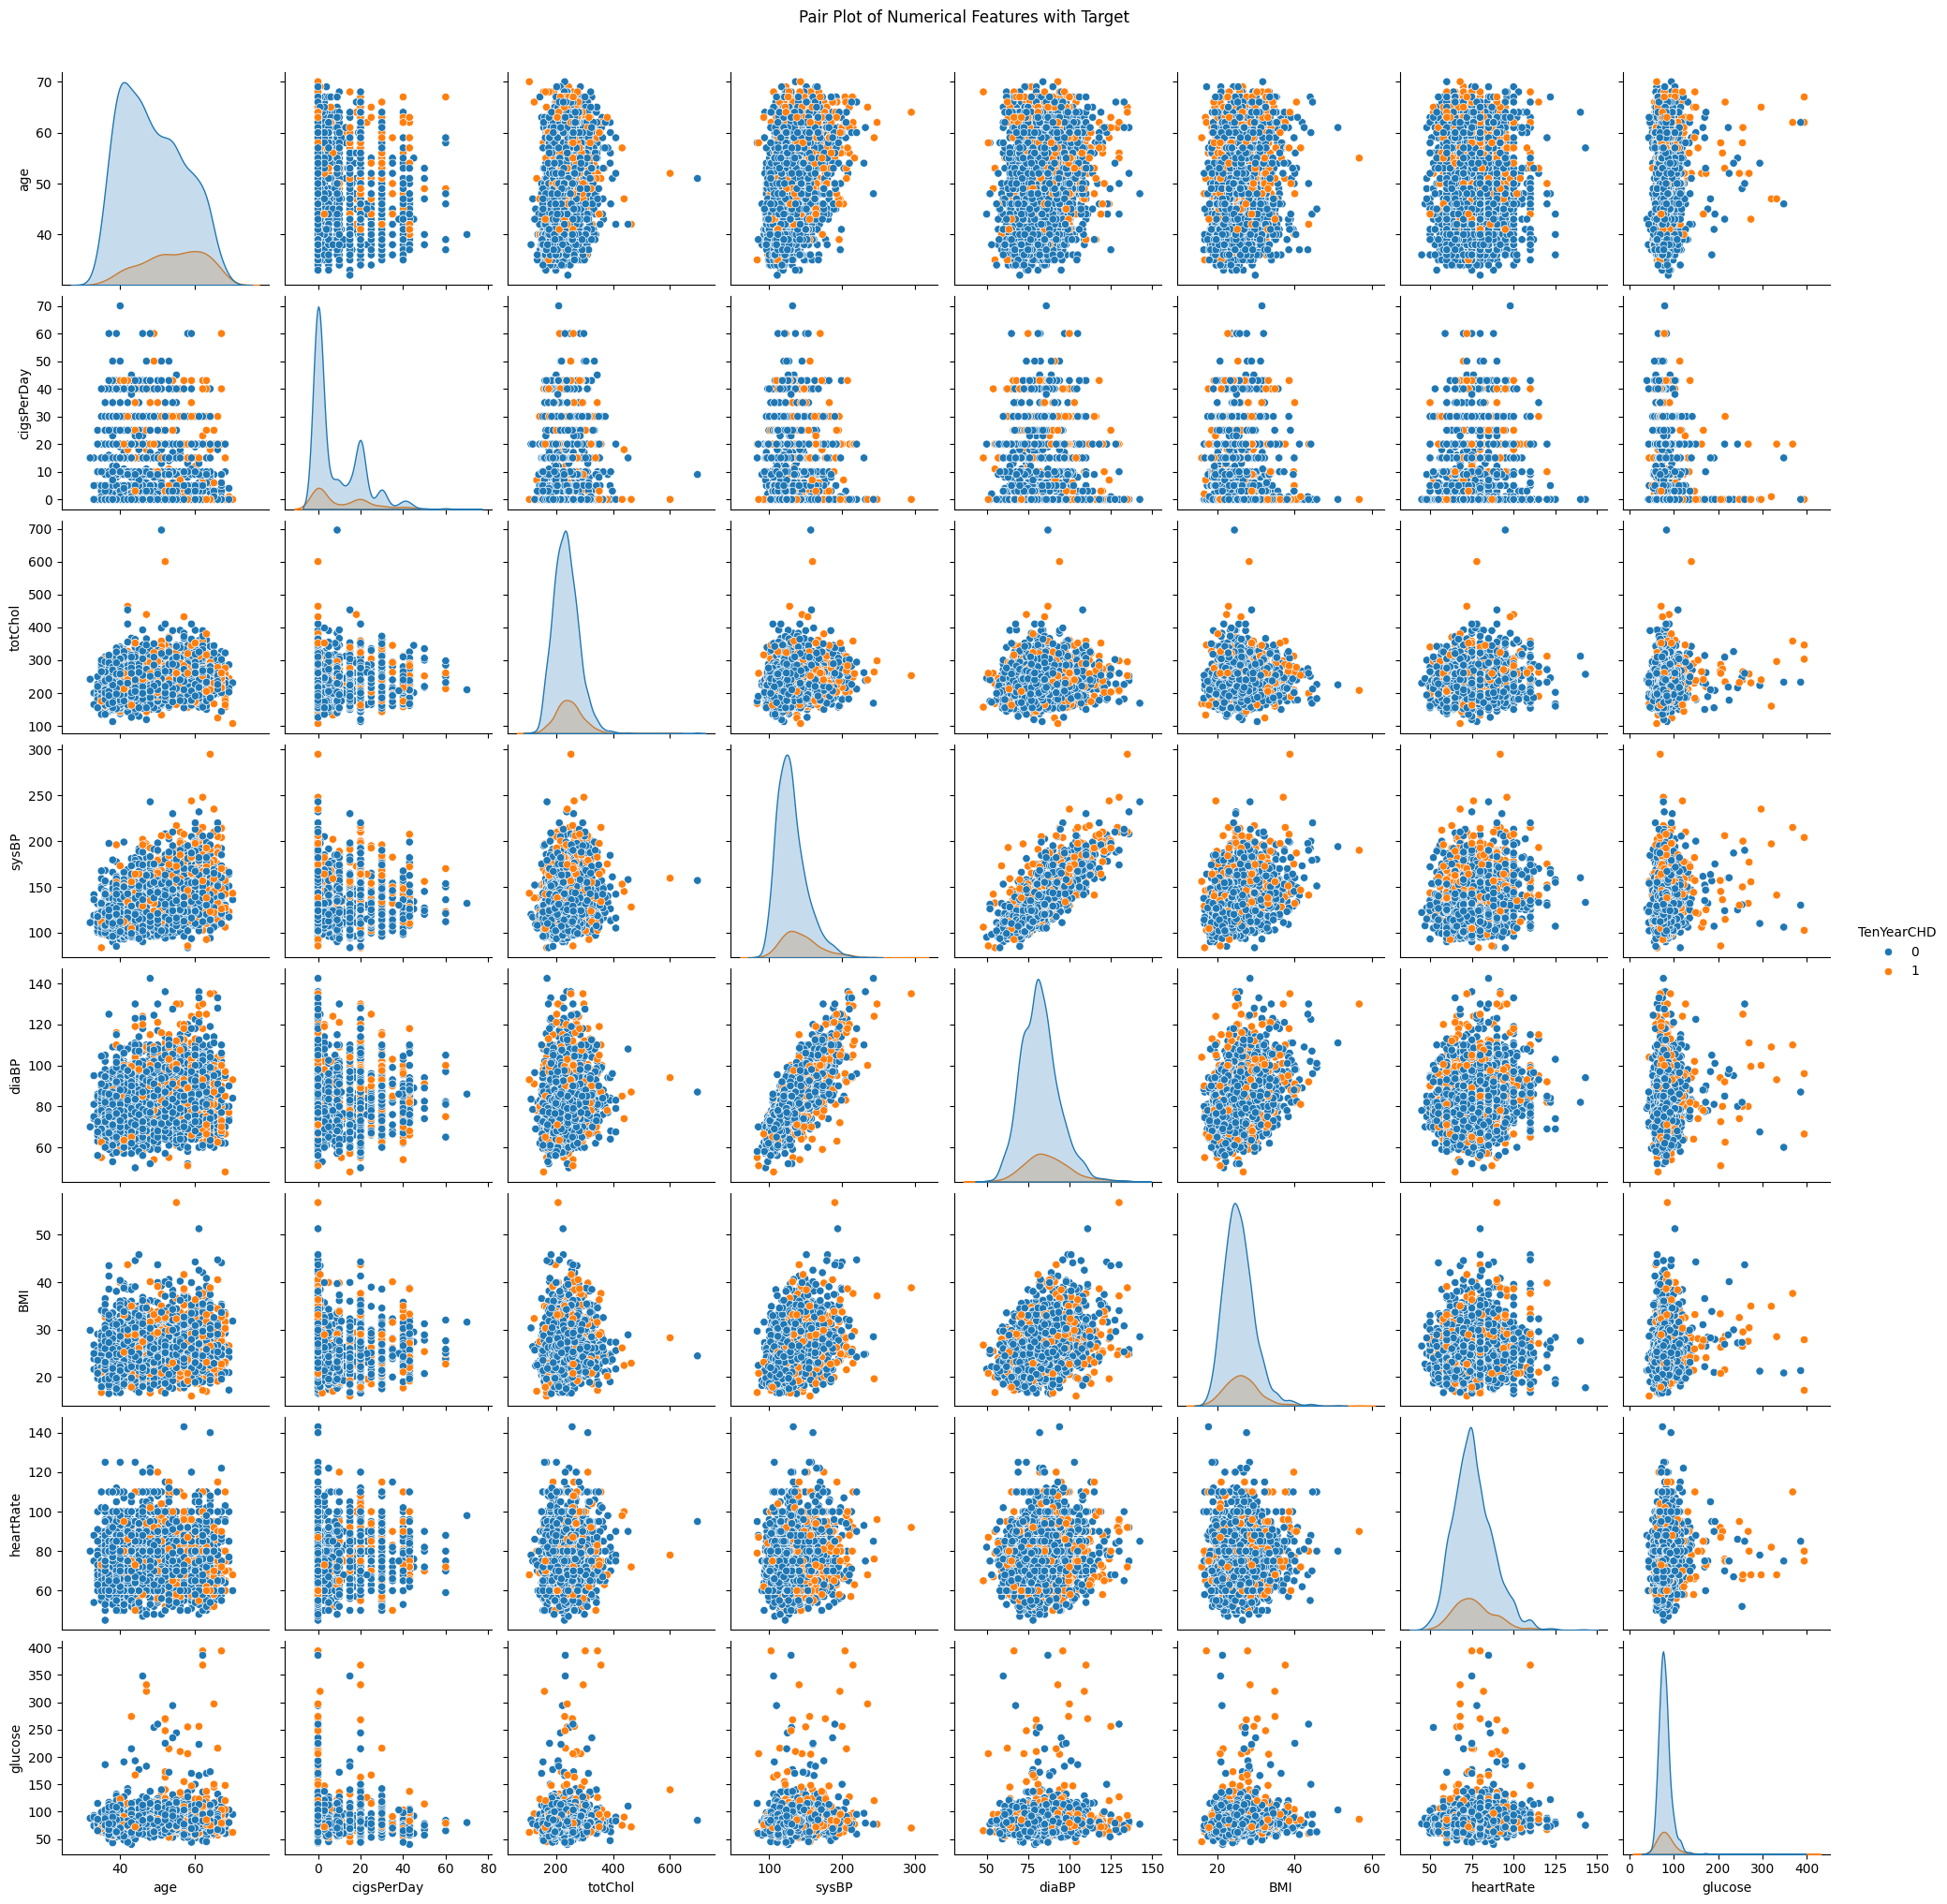

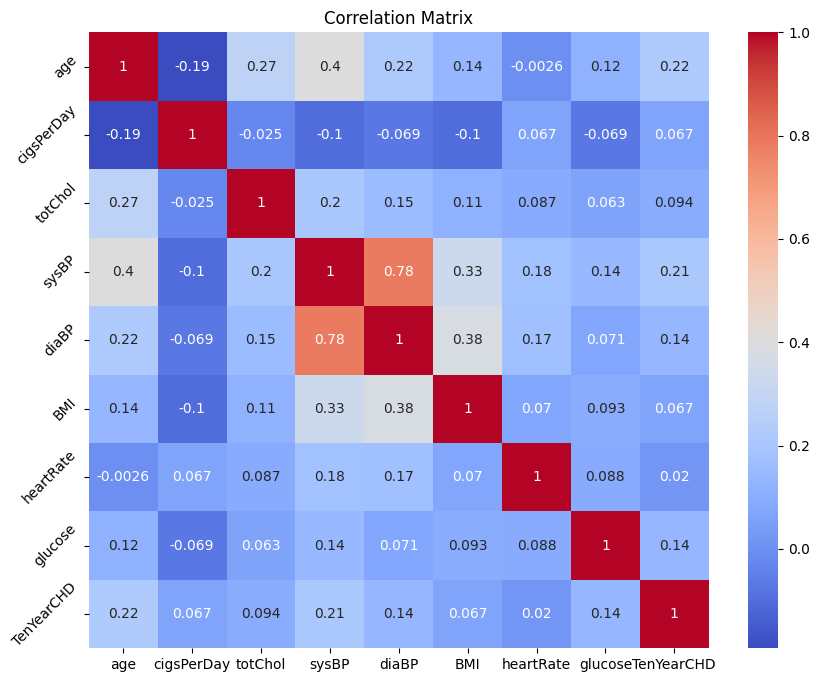

In [7]:
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Numerical Feature Distributions', y=0.92)
plt.show()

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=df)
plt.title('Distribution of Target Variable (TenYearCHD)')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_features], orient="v")
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='age', data=df)
    plt.title(f'Age by {col}')
    plt.xticks(rotation=45)
    plt.show()
    
sns.pairplot(df[numerical_features + [target]], hue=target, diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features with Target', y=1.02)
plt.show()

corr_matrix = df[numerical_features + [target]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.yticks(rotation=45)
plt.show()

**Handling Missing Values & Preprocessing**

We perform:
- **One-Hot Encoding** for categorical features
- **Scaling** for numerical features
- **Filling missing values** with mode (categorical) or median (numerical)

```python
kf = KFold(n_splits=12)
get_cvs = lambda model, xtr, ytr: list(map(lambda x: round(x*100, 3), cross_val_score(model, xtr, ytr, cv=kf, scoring='r2')))

x = df.drop(['TenYearCHD'], axis=1)
target = y = df['TenYearCHD']

print(f"\nFeatures shape: {x.shape}")
print(f"Target shape: {y.shape}")


In [8]:
kf = KFold(n_splits=8)
get_cvs = lambda model, xtr, ytr: list(map(lambda x: round(x*100, 3), cross_val_score(model, xtr, ytr, cv=kf, scoring='accuracy')))

x = df.drop(['TenYearCHD'], axis=1)
target = y = df['TenYearCHD']

print(f"\nFeatures shape: {x.shape}")
print(f"Target shape: {y.shape}")


Features shape: (3390, 15)
Target shape: (3390,)


> Helper Functions for Encoding & Scaling


In [9]:
def one_hot_encode_inst_fillna(series):
    most_frequent = series.mode()[0] if not series.mode().empty else None
    filled_series = series.fillna(most_frequent)
    encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
    encoded_array = encoder.fit_transform(filled_series.values.reshape(-1, 1))
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([series.name + '_']))
    return encoded_df

def numerical_encode_inst_fillna(series):
    median_value = series.median()
    filled_series = series.fillna(median_value)
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(filled_series.values.reshape(-1, 1))
    scaled_series = pd.Series(scaled_array.flatten(), name=series.name + '_scaled')
    return scaled_series

df_processed = df.copy(deep=True)

for col in categorical_features:
    if col in df_processed.columns:
        encoded_col_df = one_hot_encode_inst_fillna(df_processed[col])
        df_processed = pd.concat([df_processed, encoded_col_df], axis=1)
        df_processed = df_processed.drop(col, axis=1, errors='ignore')

for col in numerical_features:
    if col in df_processed.columns:
        scaled_col_series = numerical_encode_inst_fillna(df_processed[col])
        df_processed = pd.concat([df_processed, scaled_col_series], axis=1)
        df_processed = df_processed.drop(col, axis=1, errors='ignore')

df_processed.sample(10).sort_index()

,TenYearCHD,education__2.0,education__3.0,education__4.0,sex__M,is_smoking__YES,BPMeds__1.0,prevalentStroke__1,prevalentHyp__1,diabetes__1,age_scaled,cigsPerDay_scaled,totChol_scaled,sysBP_scaled,diaBP_scaled,BMI_scaled,heartRate_scaled,glucose_scaled
223,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.286072,-0.759679,-0.467681,1.139536,1.257462,-0.307628,-0.499400,0.184816
640,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.751642,-0.759679,1.888526,0.331953,0.592004,0.895366,-1.502044,-0.765186
930,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.100820,-0.759679,-0.667736,0.690879,1.257462,-0.039755,0.336137,0.487089
1493,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.518857,0.926507,-0.067570,-0.969152,-0.156635,-0.088459,-0.499400,-0.160639
1808,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.295891,0.926507,1.399502,-0.901854,-1.903461,-1.379121,0.001922,0.055270
1880,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.994247,-0.759679,0.176942,0.287088,0.092911,0.722466,1.589443,-0.592458
2303,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.402464,-0.759679,0.065800,0.040326,-0.031862,3.600886,-0.499400,-0.160639
2435,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.179499,0.926507,0.243627,-0.071838,-0.905275,-0.923737,0.670352,0.184816
3079,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.343425,2.191146,-1.001162,-1.148615,-0.988457,-0.368509,-0.081631,-0.160639
3285,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.063106,-0.759679,-0.200940,-0.385898,-0.905275,-1.123424,-0.165185,0.271180


**Splitting the Dataset**

We split the data into **training** and **testing** sets (70% train, 30% test).

```python
x = df_processed.drop(['TenYearCHD'], axis=1)
y = df_processed['TenYearCHD']


In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_processed, y, test_size=0.3, random_state=68, stratify=y)

print(f"\nProcessed training features shape: {x_train.shape}")
print(f"Processed testing features shape: {x_test.shape}")


Processed training features shape: (2373, 18)
Processed testing features shape: (1017, 18)


---

**Model Building: Logistic Regression**
Train a **Logistic Regression** model and evaluate it.

```python
LR = LogisticRegression(C=0.5, penalty='elasticnet', solver='saga', max_iter=135, l1_ratio=0.01)
LR.fit(x_train, y_train)

train_score = LR.score(x_train, y_train)
test_score = LR.score(x_test, y_test)
cvs = mean(get_cvs(LR, x_train, y_train))

precision = precision_score(y_test, LR.predict(x_test))
recall = recall_score(y_test, LR.predict(x_test))
f1 = f1_score(y_test, LR.predict(x_test))

scores.loc[len(scores.index)] = ['Logistic Regression', cvs, train_score, test_score, precision, recall, f1]


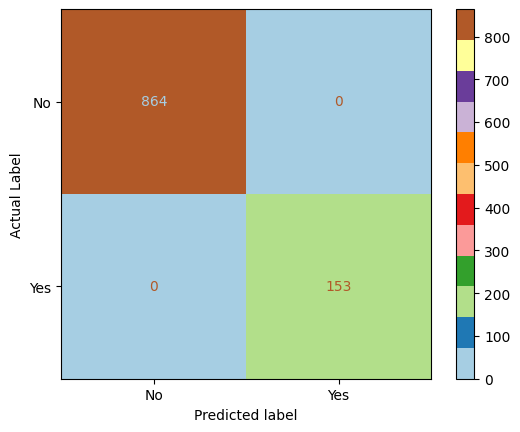

Absolute Difference Between Training and Testing Accuracy : 0.0


,Model,Cross Val Score,Train Acc,Test Acc,Precision,Recall,F1-Score
1,Logistic Regression,100.0,100.0,100.0,1.0,1.0,1.0


In [11]:
LR = LogisticRegression(C=0.5, penalty='elasticnet', solver='saga', max_iter=140, l1_ratio=0.01)

LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)

training_acc = LR.score(x_train, y_train) * 100
testing_acc = LR.score(x_test, y_test) * 100

diff = abs(training_acc - testing_acc)

scores.loc[1] = ['Logistic Regression', mean(get_cvs(LR, x_train, y_train)), training_acc, testing_acc, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), ]

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Paired')
plt.ylabel('Actual Label')
plt.show()

print(f'Absolute Difference Between Training and Testing Accuracy : {diff}')
scores

**Model Building: Decision Tree Classifier**

```python
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='log2', min_samples_leaf= 5, min_samples_split=10, random_state=50)
DTC.fit(x_train, y_train)

train_score = DTC.score(x_train, y_train)
test_score = DTC.score(x_test, y_test)
cvs = mean(get_cvs(DTC, x_train, y_train))

precision = precision_score(y_test, DTC.predict(x_test))
recall = recall_score(y_test, DTC.predict(x_test))
f1 = f1_score(y_test, DTC.predict(x_test))

scores.loc[len(scores.index)] = ['Decision Tree', cvs, train_score, test_score, precision, recall, f1]


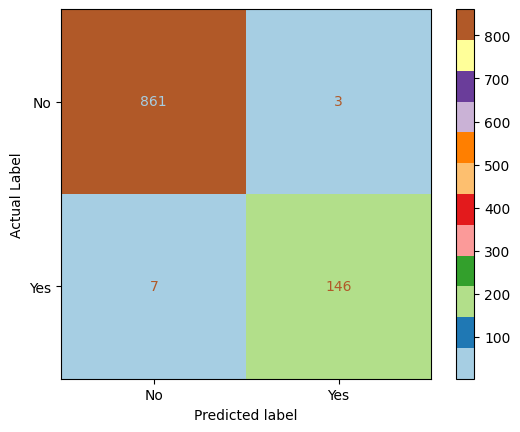

Absolute Difference Between Training and Testing Accuracy : 0.2247506672285482


,Model,Cross Val Score,Train Acc,Test Acc,Precision,Recall,F1-Score
1,Logistic Regression,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
2,Decision Tree Classification,97.388125,99.241466,99.016716,0.979866,0.954248,0.966887


In [12]:
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='log2', min_samples_leaf= 5, min_samples_split=10, random_state=50)

DTC.fit(x_train, y_train)

y_pred = DTC.predict(x_test)

training_acc = DTC.score(x_train, y_train) * 100
testing_acc = DTC.score(x_test, y_test) * 100

diff = abs(training_acc - testing_acc)

scores.loc[2] = ['Decision Tree Classification', mean(get_cvs(DTC, x_train, y_train)), training_acc, testing_acc, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), ]

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Paired')
plt.ylabel('Actual Label')
plt.show()

print(f'Absolute Difference Between Training and Testing Accuracy : {diff}')
scores

**Model Building: Random Forest Classifier**

```python
RFC = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=6, max_features='log2', min_samples_leaf=6, min_samples_split=10, bootstrap=True, random_state=36)
RFC.fit(x_train, y_train)

train_score = RFC.score(x_train, y_train)
test_score = RFC.score(x_test, y_test)
cvs = mean(get_cvs(RFC, x_train, y_train))

precision = precision_score(y_test, RFC.predict(x_test))
recall = recall_score(y_test, RFC.predict(x_test))
f1 = f1_score(y_test, RFC.predict(x_test))

scores.loc[len(scores.index)] = ['Random Forest', cvs, train_score, test_score, precision, recall, f1]


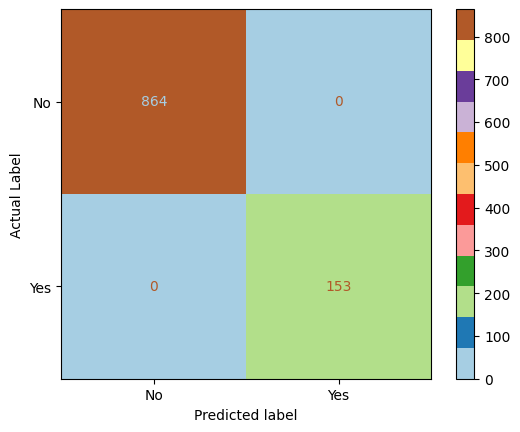

Absolute Difference Between Training and Testing Accuracy : 0.0


,Model,Cross Val Score,Train Acc,Test Acc,Precision,Recall,F1-Score
1,Logistic Regression,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
2,Decision Tree Classification,97.388125,99.241466,99.016716,0.979866,0.954248,0.966887
3,Random Forest Classification,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000


In [13]:
RFC = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=6, max_features='log2', min_samples_leaf=6, min_samples_split=10, bootstrap=True, random_state=36)

RFC.fit(x_train, y_train)

y_pred = RFC.predict(x_test)

training_acc = RFC.score(x_train, y_train) * 100
testing_acc = RFC.score(x_test, y_test) * 100

diff = abs(training_acc - testing_acc)

scores.loc[3] = ['Random Forest Classification', mean(get_cvs(RFC, x_train, y_train)), training_acc, testing_acc, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), ]

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Paired')
plt.ylabel('Actual Label')
plt.show()

print(f'Absolute Difference Between Training and Testing Accuracy : {diff}')
scores

**Model Building: Support Vector Classifier (SVC)**

```python
SVM = SVC()
SVM.fit(x_train, y_train)

train_score = SVM.score(x_train, y_train)
test_score = SVM.score(x_test, y_test)
cvs = mean(get_cvs(SVM, x_train, y_train))

precision = precision_score(y_test, SVM.predict(x_test))
recall = recall_score(y_test, SVM.predict(x_test))
f1 = f1_score(y_test, SVM.predict(x_test))

scores.loc[len(scores.index)] = ['Support Vector Classifier', cvs, train_score, test_score, precision, recall, f1]


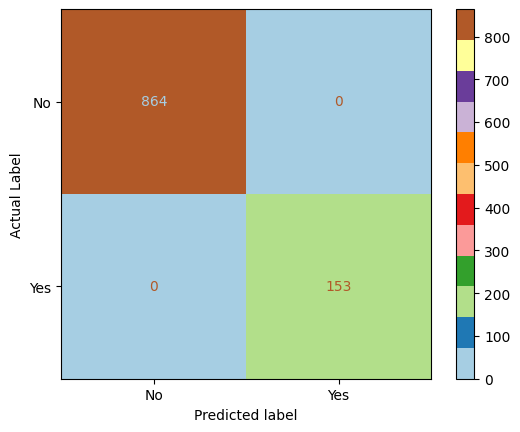

Absolute Difference Between Training and Testing Accuracy : 0.0


,Model,Cross Val Score,Train Acc,Test Acc,Precision,Recall,F1-Score
1,Logistic Regression,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
2,Decision Tree Classification,97.388125,99.241466,99.016716,0.979866,0.954248,0.966887
3,Random Forest Classification,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
4,Support Vector Classfication,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000


In [14]:
SVM = SVC(C=np.float64(1.3292918943162166), class_weight=None, coef0=np.float64(-0.8165652101338362), degree=5, gamma='scale', kernel='linear', probability=True,shrinking=False)
SVM.fit(x_train, y_train)

y_pred = SVM.predict(x_test)

training_acc = SVM.score(x_train, y_train) * 100
testing_acc = SVM.score(x_test, y_test) * 100

diff = abs(training_acc - testing_acc)

scores.loc[4] = ['Support Vector Classfication', mean(get_cvs(SVM, x_train, y_train)), training_acc, testing_acc, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), ]

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Paired')
plt.ylabel('Actual Label')
plt.show()

print(f'Absolute Difference Between Training and Testing Accuracy : {diff}')
scores

**Model Building: K-Nearest Neighbors (KNN)**

```python
KNC = KNeighborsClassifier(n_neighbors=5)
KNC.fit(x_train, y_train)

train_score = KNC.score(x_train, y_train)
test_score = KNC.score(x_test, y_test)
cvs = mean(get_cvs(KNC, x_train, y_train))

precision = precision_score(y_test, KNC.predict(x_test))
recall = recall_score(y_test, KNC.predict(x_test))
f1 = f1_score(y_test, KNC.predict(x_test))

scores.loc[len(scores.index)] = ['K-Nearest Neighbors', cvs, train_score, test_score, precision, recall, f1]


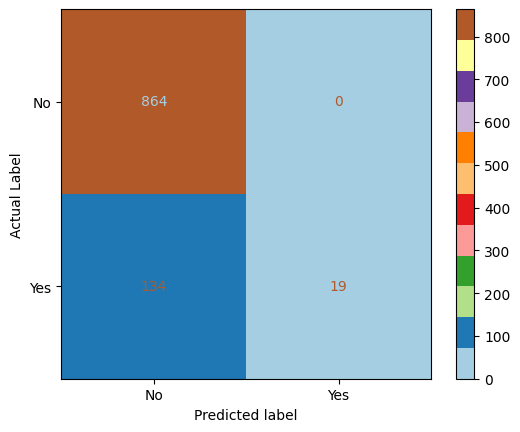

Absolute Difference Between Training and Testing Accuracy : 0.5759235847731361


,Model,Cross Val Score,Train Acc,Test Acc,Precision,Recall,F1-Score
1,Logistic Regression,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
2,Decision Tree Classification,97.388125,99.241466,99.016716,0.979866,0.954248,0.966887
3,Random Forest Classification,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
4,Support Vector Classfication,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
5,K Nearest Neighbors Classfication,85.926125,87.399916,86.823992,1.000000,0.124183,0.220930


In [15]:
KNC = KNeighborsClassifier(n_neighbors=19)
KNC.fit(x_train, y_train)

y_pred = KNC.predict(x_test)

training_acc = KNC.score(x_train, y_train) * 100
testing_acc = KNC.score(x_test, y_test) * 100

diff = abs(training_acc - testing_acc)

scores.loc[5] = ['K Nearest Neighbors Classfication', mean(get_cvs(KNC, x_train, y_train)), training_acc, testing_acc, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), ]

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Paired')
plt.ylabel('Actual Label')
plt.show()

print(f'Absolute Difference Between Training and Testing Accuracy : {diff}')
scores

**Results and Conclusions**

Summarize the key findings, model performance, and insights gained from the classification project. Discuss any limitations and potential future work.


>>  Observations

*Classification Performance:*

-   Discuss the accuracy, precision, recall, and F1-score of the models.
-   Highlight the best-performing model and its strengths.

*Feature Importance:*

-   If applicable (e.g., for tree-based models), discuss the importance of different features in the classification task.

*Potential Challenges:*

-   Address issues like class imbalance, multicollinearity, or high dimensionality.

*Insights:*

-   Interpret the classification results in the context of the problem domain.
-   Draw meaningful conclusions from the analysis.

*Future Directions:*

-   Suggest potential improvements or further investigations.

*Why Models Performed as They Did*

Here's an analysis of the classification model performance:

| Sr. No. | Model                            |  Cross Val Score  |  Train Acc  |  Test Acc  |  Precision  |  Recall  |  F1-Score |
|:--------|---------------------------------:|------------------:|------------:|-----------:|------------:|---------:|----------:|
|   1     |Logistic Regression               |          100      |    100      |     100    |      1      |     1    |      1    |
|   2     |Decision Tree Classification      |           97.38   |     99.24   |      99.02 |       0.98  |     0.95 |      0.97 |
|   3     |Random Forest Classification      |          100      |     100     |     100    |       1     |     1    |      1    |
|   4     |Support Vector Classfication      |          100      |     100     |     100    |       1     |     1    |      1    |
|   5     |K Nearest Neighbors Classfication |           85.92   |      87.40  |      86.82 |       1     |     0.12 |      0.22 |


